<a href="https://colab.research.google.com/github/Keerthana-singupuram/-Prediction-of-Student-Performances-from-Game-Play./blob/main/Predict_Student_Performance_from_Game_Play.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Student Performances from Game Play.**

### The objective aims to predict the performance of students while playing an educational game. The data available to train a model is a large game log. We need to predict whether each student answered each question correctly, which involves binary classification for each question in each student session.
---



**Files:**

***train.csv*** - the training set

***test.csv*** - the test set

***sample_submission.csv*** - a sample submission file in the correct format

***train_labels.csv*** - correct value for all 18 questions for each session in the training set.



---


**Columns:**

***session_id*** - the ID of the session the event took place in

***index*** - the index of the event for the session

***elapsed_time*** - how much time has passed (in milliseconds) between 
the start of the session and when the event was recorded

***event_name*** - the name of the event type

***name*** - the event name (e.g. identifies whether a notebook_click is is opening or closing the notebook)

***level*** - what level of the game the event occurred in (0 to 22)

***page*** - the page number of the event (only for notebook-related events)

***room_coor_x*** - the coordinates of the click in reference to the in-game room (only for click events)

***room_coor_y*** - the coordinates of the click in reference to the in-game room (only for click events)

***screen_coor_x*** - the coordinates of the click in reference to the player’s screen (only for click events)

***screen_coor_y*** - the coordinates of the click in reference to the player’s screen (only for click events)

***hover_duration*** - how long (in milliseconds) the hover happened for (only for hover events)

***text*** - the text the player sees during this event

***fqid*** - the fully qualified ID of the event

***room_fqid*** - the fully qualified ID of the room the event took place in.

***text_fqid*** - the fully qualified ID.

***fullscreen*** - whether the player is in fullscreen mode

***hq*** - whether the game is in high-quality

***music***- whether the game music is on or off

***level_group*** - which group of levels - and group of questions - this row belongs to (0-4, 5-12, 13-22)

## **Import the libraries :**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

## **Load the data :**

In [ ]:
train_df = pd.read_csv('/content/Train set.csv')
test_df = pd.read_csv('/content/test.csv')
labels_df = pd.read_csv('/content/train_labels.csv')
submission_df = pd.read_csv('/content/sample_submission.csv')

## **Basic Investigation :**

In [ ]:
print("Train: rows", len(train_df), "| columns", len(train_df.columns))
print("Test: rows", len(test_df), "| columns", len(test_df.columns))

train_df.head(2)

Train: rows 16383 | columns 20
Test: rows 3728 | columns 21


,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,2.009030e+16,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,2.009030e+16,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4


## **Missing Values :**

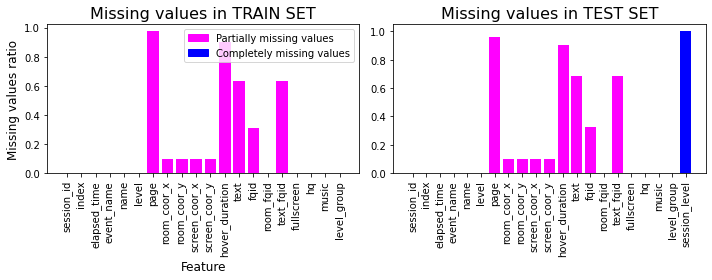

In [ ]:
train_missing_ratios = train_df.isna().sum() / len(train_df)
test_missing_ratios = test_df.isna().sum() / len(test_df)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(train_missing_ratios.index,
        train_missing_ratios.values,
        color=['blue' if ratio == 1 else 'magenta' for ratio in train_missing_ratios.values])
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Missing values ratio', fontsize=12)
plt.title('Missing values in TRAIN SET', fontsize=16)
plt.xticks(rotation=90)
plt.legend(handles=[mpatches.Patch(color='magenta'),
                    mpatches.Patch(color='blue')], 
           labels=['Partially missing values', 'Completely missing values'])

plt.subplot(1, 2, 2)
plt.bar(test_missing_ratios.index,
        test_missing_ratios.values,
        color=['blue' if ratio == 1 else 'magenta' for ratio in test_missing_ratios.values])
plt.title('Missing values in TEST SET', fontsize=16)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## **Exploratory Data Analysis :**


In [ ]:
print("The longest session  of the training set lasted about",
      int(train_df['elapsed_time'].max() / 8.64e7), "days.")
print("The longest session of the testing set lasted about",
      int(test_df['elapsed_time'].max() / 1000), "sec.")

The longest session  of the training set lasted about 0 days.
The longest session of the testing set lasted about 6524 sec.


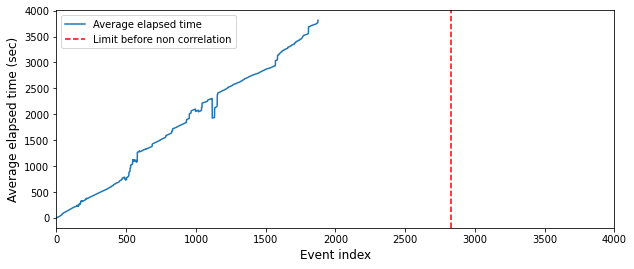

In [ ]:
avg_elapsed_time = train_df.groupby('index')['elapsed_time'].mean() / 1000

plt.figure(figsize=(10, 4))
plt.plot(avg_elapsed_time)
plt.axvline(2825, color='red', ls='--')
plt.xlabel("Event index", fontsize=12)
plt.ylabel("Average elapsed time (sec)", fontsize=12)
plt.xlim([0, 4000])
plt.legend(['Average elapsed time', 'Limit before non correlation'])

plt.show()

Number of event names: 11
Number of names: 6


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'basic'),
  Text(1, 0, 'undefined'),
  Text(2, 0, 'close'),
  Text(3, 0, 'open'),
  Text(4, 0, 'prev'),
  Text(5, 0, 'next')])

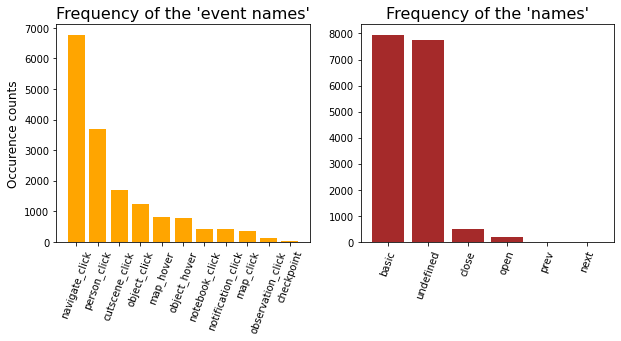

In [ ]:
event_names = train_df['event_name'].value_counts()
names = train_df['name'].value_counts()

print("Number of event names:", len(event_names))
print("Number of names:", len(names))

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(event_names.index, event_names.values, color='orange')
plt.ylabel("Occurence counts", fontsize=12)
plt.title("Frequency of the 'event names'", fontsize=16)
plt.xticks(rotation=70)

plt.subplot(1, 2, 2)
plt.bar(names.index, names.values, color='brown')
plt.title("Frequency of the 'names'", fontsize=16)
plt.xticks(rotation=70)

<Figure size 432x288 with 0 Axes>

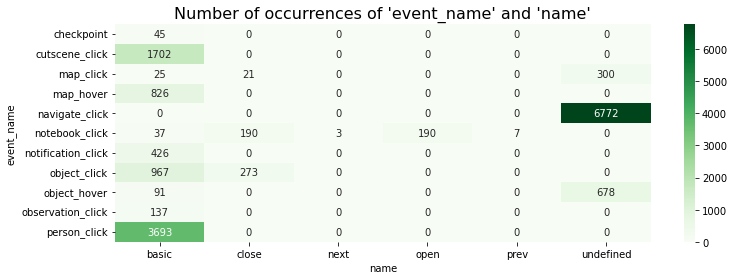

In [ ]:
plt.tight_layout()
plt.show()

# Pivot table
pivot_table = train_df.pivot_table(index='event_name', columns='name', aggfunc='size')
pivot_table = pivot_table.fillna(0).astype(int)
plt.figure(figsize=(12, 4))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Greens')
plt.title("Number of occurrences of 'event_name' and 'name'", fontsize=16)
plt.show()

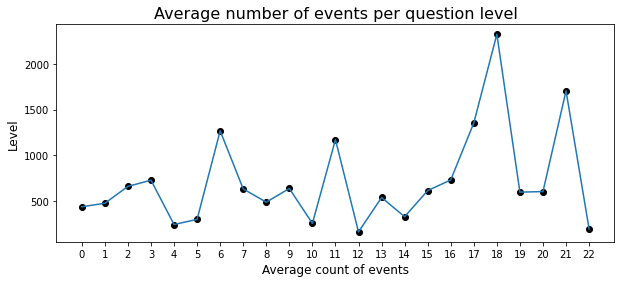

In [ ]:
grouped_df = train_df.groupby(['session_id', 'level'])\
    ['index'].count().reset_index()
grouped_df.columns = ['session_id', 'level', 'index_count']
mean_counts = grouped_df.groupby('level').mean().drop('session_id', axis=1)
mean_counts

xrange = range(0, 23)
plt.figure(figsize=(10, 4))
plt.plot(mean_counts)
plt.scatter(xrange, mean_counts, color='black')
plt.title("Average number of events per question level", fontsize=16)
plt.xlabel("Average count of events", fontsize=12)
plt.ylabel("Level", fontsize=12)
plt.xticks(xrange)
plt.show()

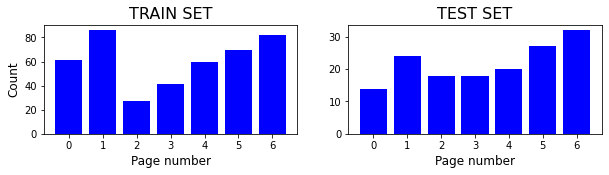

In [ ]:
train_page_number_counts = train_df['page'].value_counts().sort_index()
test_page_number_counts = test_df['page'].value_counts().sort_index()
plt.figure(figsize=(10, 2))

plt.subplot(1, 2, 1)
plt.bar(range(0, 7), train_page_number_counts, color='blue')
plt.xlabel("Page number", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("TRAIN SET",
          fontsize=16)

plt.subplot(1, 2, 2)
plt.bar(range(0, 7), test_page_number_counts, color='blue')
plt.xlabel("Page number", fontsize=12)
plt.title("TEST SET",
          fontsize=16)

plt.show()

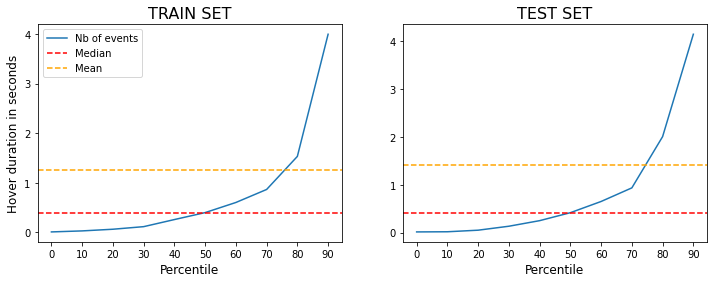

In [ ]:
train_hover = train_df['hover_duration'].dropna() / 1000
test_hover = test_df['hover_duration'].dropna() / 1000
xrange = range(0, 100, 10)
train_percentiles , test_percentiles = [], []
for q in xrange:
    train_perc = np.percentile(train_hover, q)
    test_perc = np.percentile(test_hover, q)
    train_percentiles.append(train_perc)
    test_percentiles.append(test_perc)
    
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(xrange, train_percentiles)
plt.axhline(train_hover.median(), color='red', ls='--')
plt.axhline(train_hover.mean(), color='orange', ls='--')
plt.xticks(xrange)
plt.yticks(range(0, 5))
plt.legend(['Nb of events', 'Median', 'Mean'])
plt.xlabel("Percentile", fontsize=12)
plt.ylabel("Hover duration in seconds", fontsize=12)
plt.title("TRAIN SET", fontsize=16)
plt.subplot(1, 2, 2)
plt.plot(xrange, test_percentiles)
plt.axhline(test_hover.median(), color='red', ls='--')
plt.axhline(test_hover.mean(), color='orange', ls='--')
plt.xticks(xrange)
plt.xlabel("Percentile", fontsize=12)
plt.title("TEST SET", fontsize=16)
plt.show()

In [ ]:
train_texts = train_df['text'].dropna().value_counts()
test_texts = test_df['text'].dropna().value_counts()
print("TRAIN | nb of unique texts:", len(train_texts))
print('-' * 60)
print(train_texts, '\n')
print("TEST | nb of unique texts:", len(test_texts))
print('-' * 60)
print(test_texts, '\n')

TRAIN | nb of unique texts: 532
------------------------------------------------------------
undefined                                                   258
Hey!                                                         31
I should go to the Capitol and tell Mrs. M!                  29
This is perfect for the exhibit.                             28
Look at all those activists!                                 28
                                                           ... 
Hi, Mrs. M.                                                   1
Head back to the museum. Your gramps is waiting for you.      1
You're still here? I'm trying to work!                        1
Run along to the university.                                  1
What are you still doing here,  Jolie?                        1
Name: text, Length: 532, dtype: int64 

TEST | nb of unique texts: 495
------------------------------------------------------------
undefined                                     27
You can talk to a text

In [ ]:
train_fqids = train_df['fqid'].value_counts()
train_room_fqids = train_df['room_fqid'].value_counts()
train_text_fqids = train_df['text_fqid'].value_counts()
test_fqids = test_df['fqid'].value_counts()
test_room_fqids = test_df['room_fqid'].value_counts()
test_text_fqids = test_df['text_fqid'].value_counts()
train_fqid_bundle = [train_fqids, train_room_fqids, train_text_fqids]
test_fqid_bundle = [test_fqids, test_room_fqids, test_text_fqids]
fqid_labels = ["fqid", "room_fqid", "text_fqid"]

In [ ]:
def print_fqids(set_name, bundle):
    for label, value in zip(fqid_labels, bundle):
        print('-' * 60)
        print(set_name, label)
        print('-' * 60)
        print(value)  
print_fqids('TRAIN', train_fqid_bundle)
print_fqids('TEST', test_fqid_bundle)


------------------------------------------------------------
TRAIN fqid
------------------------------------------------------------
worker                     1098
gramps                      719
archivist                   665
toentry                     481
wells                       451
                           ... 
block_tocollection            4
block_0                       4
reader_flag.paper1.prev       4
doorblock                     4
reader.paper0.prev            3
Name: fqid, Length: 119, dtype: int64
------------------------------------------------------------
TRAIN room_fqid
------------------------------------------------------------
tunic.historicalsociety.entry              2328
tunic.wildlife.center                      1740
tunic.historicalsociety.cage               1370
tunic.library.frontdesk                    1306
tunic.historicalsociety.stacks             1122
tunic.historicalsociety.frontdesk          1106
tunic.historicalsociety.closet_dirty       1061
tun

In [ ]:
data = {"Nb unique values": fqid_labels,
        "TRAIN": [len(x) for x in train_fqid_bundle],
        "TEST": [len(x) for x in test_fqid_bundle]}
df = pd.DataFrame(data).set_index('Nb unique values')
df

,TRAIN,TEST
Nb unique values,,
fqid,119,112
room_fqid,19,19
text_fqid,105,91


In [ ]:
labels_df['question'] = labels_df['session_id'].apply(lambda x: int(x.split('_')[1][1:]))
correct_ratios = []
for q in range(1, 19):
    tmp = labels_df[labels_df['question'] == q]['correct']
    ratio = tmp.sum() / len(tmp) 
    correct_ratios.append(ratio)
xrange = range(1, 19)
mean = np.mean(correct_ratios)

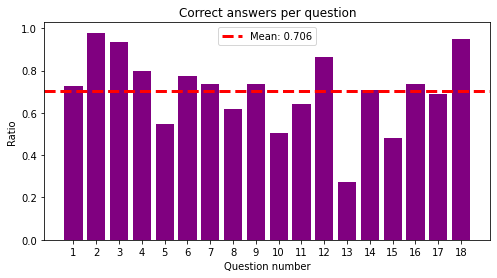

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(x=xrange, height=correct_ratios, color='purple')
plt.axhline(mean, color='red', ls='--', lw=3)
plt.xticks(xrange)
plt.legend([f'Mean: {mean:.3f}'])
plt.title("Correct answers per question")
plt.xlabel("Question number")
plt.ylabel("Ratio")
plt.show()

In [ ]:
classes_count = labels_df['correct'].value_counts()
print("Classes count:\n", classes_count, "\n")
print("Ratio:\n", classes_count / len(labels_df))
labels_df

Classes count:
 1    299271
0    124845
Name: correct, dtype: int64 

Ratio:
 1    0.705635
0    0.294365
Name: correct, dtype: float64


,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090312455206810_q1,1
3,20090313091715820_q1,0
4,20090313571836404_q1,1
...,...,...
424111,22100215342220508_q18,1
424112,22100215460321130_q18,1
424113,22100217104993650_q18,1
424114,22100219442786200_q18,1


**Interpretation :**

The following are the ***insights*** found -

* It is quite a big dataframe (the train.csv file is more than 2GB large). It has more than **13** millions rows and a few features.
* About **70%** of the answers are correct and 30% are incorrect.
* The dataset is slightly **imbalanced**.
* The train and test dataframes have **similar ratios** of missing values which are good news.
* The labels only go up to level **18**, even though the questions extend up to level **22** in the training set.
* In the training set, we can observe that the mean is significantly **higher than the median**, which is due to the presence of outliers where the user remained on hover for an extended period.
